In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="Set2")
plt.style.use('ggplot')

In [22]:
CKD_INDIA_PATH = Path("../data/Public_Datasets/CKD_India_Dataset/kidney_disease.csv")

In [23]:
df = pd.read_csv(CKD_INDIA_PATH)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [25]:
parameter_renames = {
    "bp": "blood_pressure",
    "sg": "specific_gravity",
    "al": "albumin",
    "su": "sugar",
    "rbc": "red_blood_cells",
    "pc": "pus_cell",
    "pcc": "pus_cell_clumps",
    "ba": "bacteria",
    "bgr": "blood_glucose_random",
    "bu": "blood_urea",
    "sc": "serum_creatinine",
    "sod": "sodium",
    "pot": "potassium",
    "hemo": "hemoglobin",
    "pcv": "packed_cell_volume",
    "wc": "white_blood_cell_count",
    "rc": "red_blood_cell_count",
    "htn": "hypertension",
    "dm": "diabetes_mellitus",
    "cad": "coronary_artery_disease",
    "pe": "pedal_edema",
    "ane": "anemia"
}

In [26]:
# Rename variables to be more descriptive
df = df.rename(columns=parameter_renames)

# Strip whitespace around values
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.strip()

In [27]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appet', 'pedal_edema',
       'anemia', 'classification'],
      dtype='object')

In [28]:
# Drop columns which aren't useful for early diagnosis or have missing values
to_drop = [
    "id",
    "albumin",
    "specific_gravity", 
    "sugar",
    "bacteria",
    "blood_urea", 
    "red_blood_cells", 
    "pus_cell", 
    "pus_cell_clumps" , 
    "red_blood_cell_count", 
    "white_blood_cell_count", 
    "packed_cell_volume",
    "potassium",
    "sodium",
    ]

df = df.drop(columns=to_drop)

# Convert to standard units used in Croatia
df["hemoglobin"] = df.hemoglobin * 10
df["blood_glucose_random"] = df.blood_glucose_random / 18
df["serum_creatinine"] = df.serum_creatinine * 88.4

df.head()

,age,blood_pressure,blood_glucose_random,serum_creatinine,hemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appet,pedal_edema,anemia,classification
0,48.0,80.0,6.722222,106.08,154.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,NaN,70.72,113.0,no,no,no,good,no,no,ckd
2,62.0,80.0,23.500000,159.12,96.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,6.500000,335.92,112.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,5.888889,123.76,116.0,no,no,no,good,no,no,ckd


<Axes: xlabel='age', ylabel='Count'>

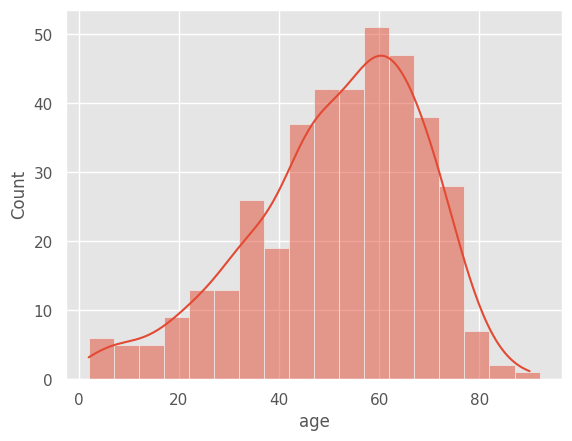

In [29]:
# Age distribution
sns.histplot(data=df, x="age", binwidth=5, kde=True)

In [30]:
# Remove peadiatric population and age outliers
df = df.loc[(df["age"] >= 18) & (df["age"] <= 85)].copy()

Number of entries with at least one missing parameter: 88

                         Number of missing  Percent missing
hemoglobin                              48        12.938005
blood_glucose_random                    35         9.433962
serum_creatinine                        16         4.312668
blood_pressure                           6         1.617251
hypertension                             2         0.539084
diabetes_mellitus                        2         0.539084
coronary_artery_disease                  2         0.539084
appet                                    1         0.269542
pedal_edema                              1         0.269542
anemia                                   1         0.269542
age                                      0         0.000000
classification                           0         0.000000


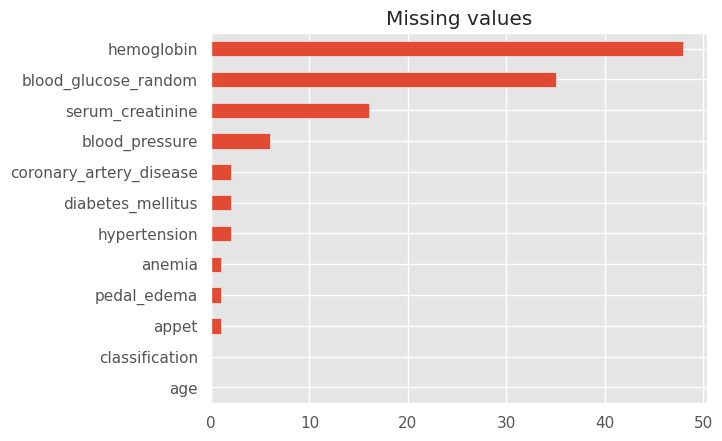

In [31]:
print(f"Number of entries with at least one missing parameter: {df.isna().any(axis=1).sum()}\n")

missing_values = df.isnull().sum()
df_missing = pd.DataFrame({"Number of missing": missing_values, "Percent missing": missing_values * 100 / len(df)})

print(df_missing.sort_values(by="Number of missing", ascending=False))
df_missing["Number of missing"].sort_values().plot(kind="barh", title="Missing values");

In [32]:
df = df.loc[df.hemoglobin.notna() & df.blood_glucose_random.notna()]
df

,age,blood_pressure,blood_glucose_random,serum_creatinine,hemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appet,pedal_edema,anemia,classification
0,48.0,80.0,6.722222,106.08,154.0,yes,yes,no,good,no,no,ckd
2,62.0,80.0,23.500000,159.12,96.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,6.500000,335.92,112.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,5.888889,123.76,116.0,no,no,no,good,no,no,ckd
5,60.0,90.0,4.111111,97.24,122.0,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...
393,43.0,60.0,6.500000,61.88,130.0,no,no,no,good,no,no,notckd
394,50.0,80.0,7.611111,70.72,141.0,no,no,no,good,no,no,notckd
395,55.0,80.0,7.777778,44.20,157.0,no,no,no,good,no,no,notckd
396,42.0,70.0,4.166667,106.08,165.0,no,no,no,good,no,no,notckd


In [33]:
print(f"Number of entries with at least one missing parameter: {df.isna().any(axis=1).sum()}\n")

missing_values = df.isnull().sum()
df_missing = pd.DataFrame({"Number of missing": missing_values, "Percent missing": missing_values * 100 / len(df)})

print(df_missing.sort_values(by="Number of missing", ascending=False))

Number of entries with at least one missing parameter: 11

                         Number of missing  Percent missing
blood_pressure                           4         1.360544
serum_creatinine                         4         1.360544
hypertension                             2         0.680272
diabetes_mellitus                        2         0.680272
coronary_artery_disease                  2         0.680272
appet                                    1         0.340136
pedal_edema                              1         0.340136
anemia                                   1         0.340136
age                                      0         0.000000
blood_glucose_random                     0         0.000000
hemoglobin                               0         0.000000
classification                           0         0.000000


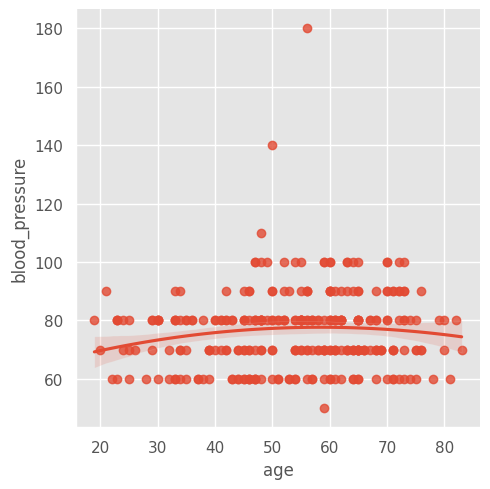

In [34]:
# Check relationship between blood pressure and age

"""
Diastolic blood pressure (DBP), however, has a varying pattern with ageing, 
increasing until the fifth decade and slowly decreasing from the age of 60 to at least 84 years of age. 
"""

sns.lmplot(data=df, x="age", y="blood_pressure", order=2);

In [35]:
# Remove blood pressure outliers

df = df.loc[df["blood_pressure"] <= 120].copy()

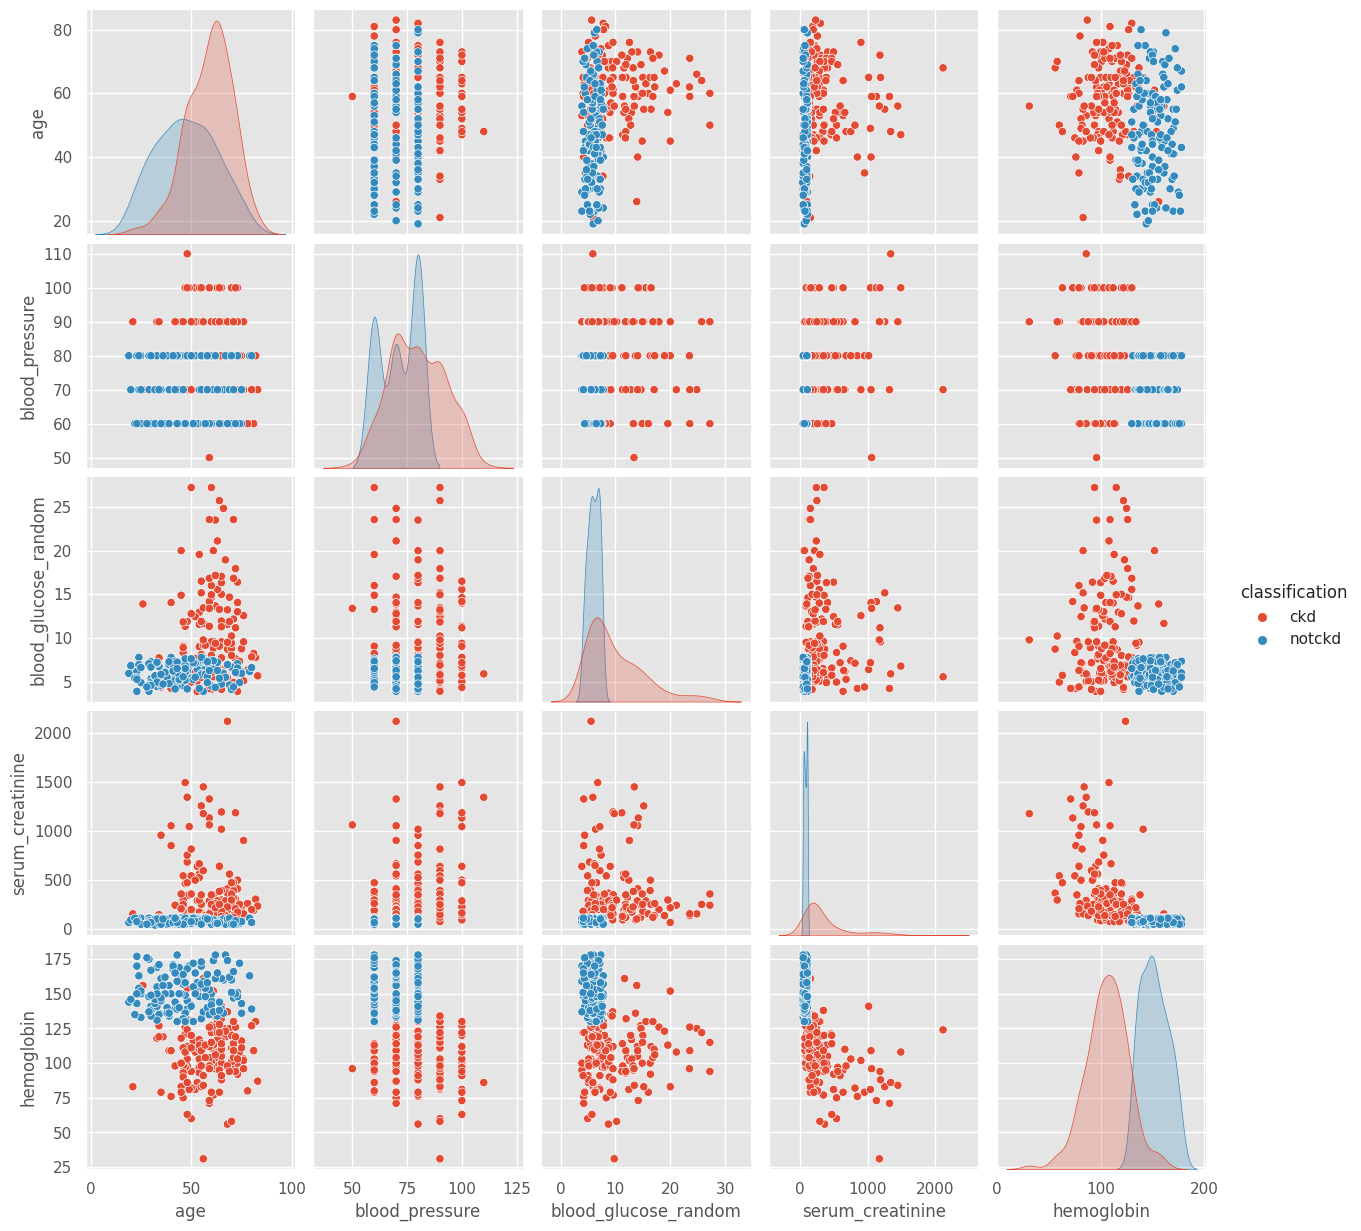

In [36]:
# Check relationship of variables with target

sns.pairplot(df, hue="classification");

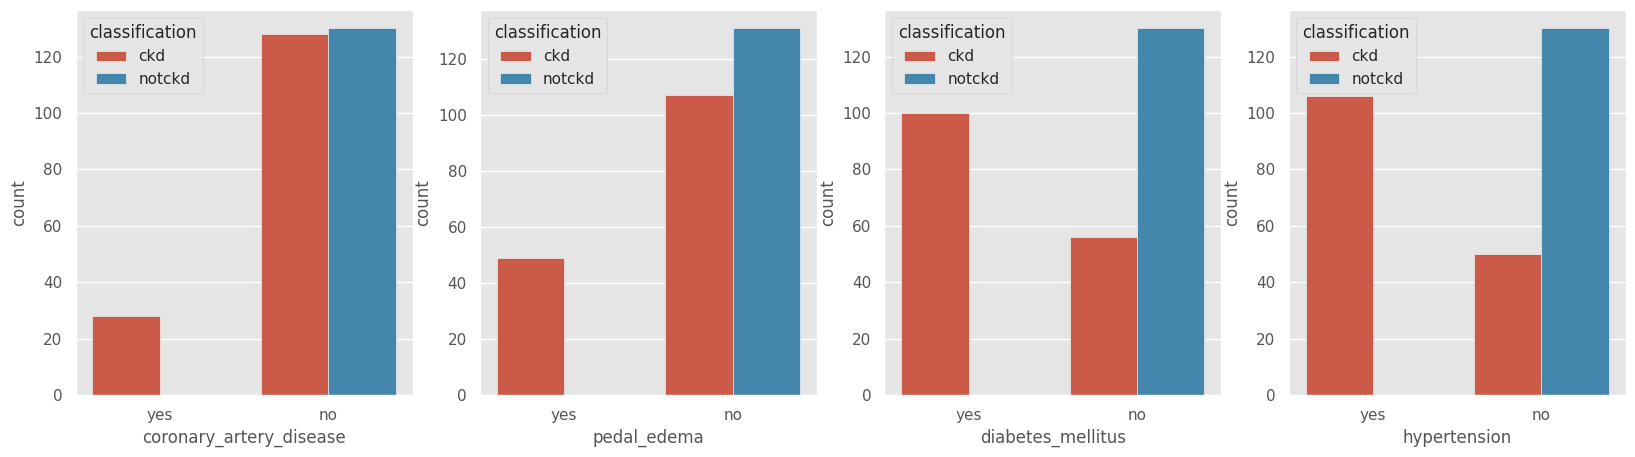

In [37]:
# Check if anemia and diabetes diagnosis make sense
fig, axes = plt.subplots(1,4, figsize=(20,5))
sns.countplot(data=df, x="coronary_artery_disease", hue="classification", ax=axes[0], order=["yes", "no"])
sns.countplot(data=df, x="pedal_edema", hue="classification", ax=axes[1], order=["yes", "no"]);
sns.countplot(data=df, x="diabetes_mellitus", hue="classification", ax=axes[2], order=["yes", "no"]);
sns.countplot(data=df, x="hypertension", hue="classification", ax=axes[3], order=["yes", "no"]);

In [38]:
df.shape

(288, 12)

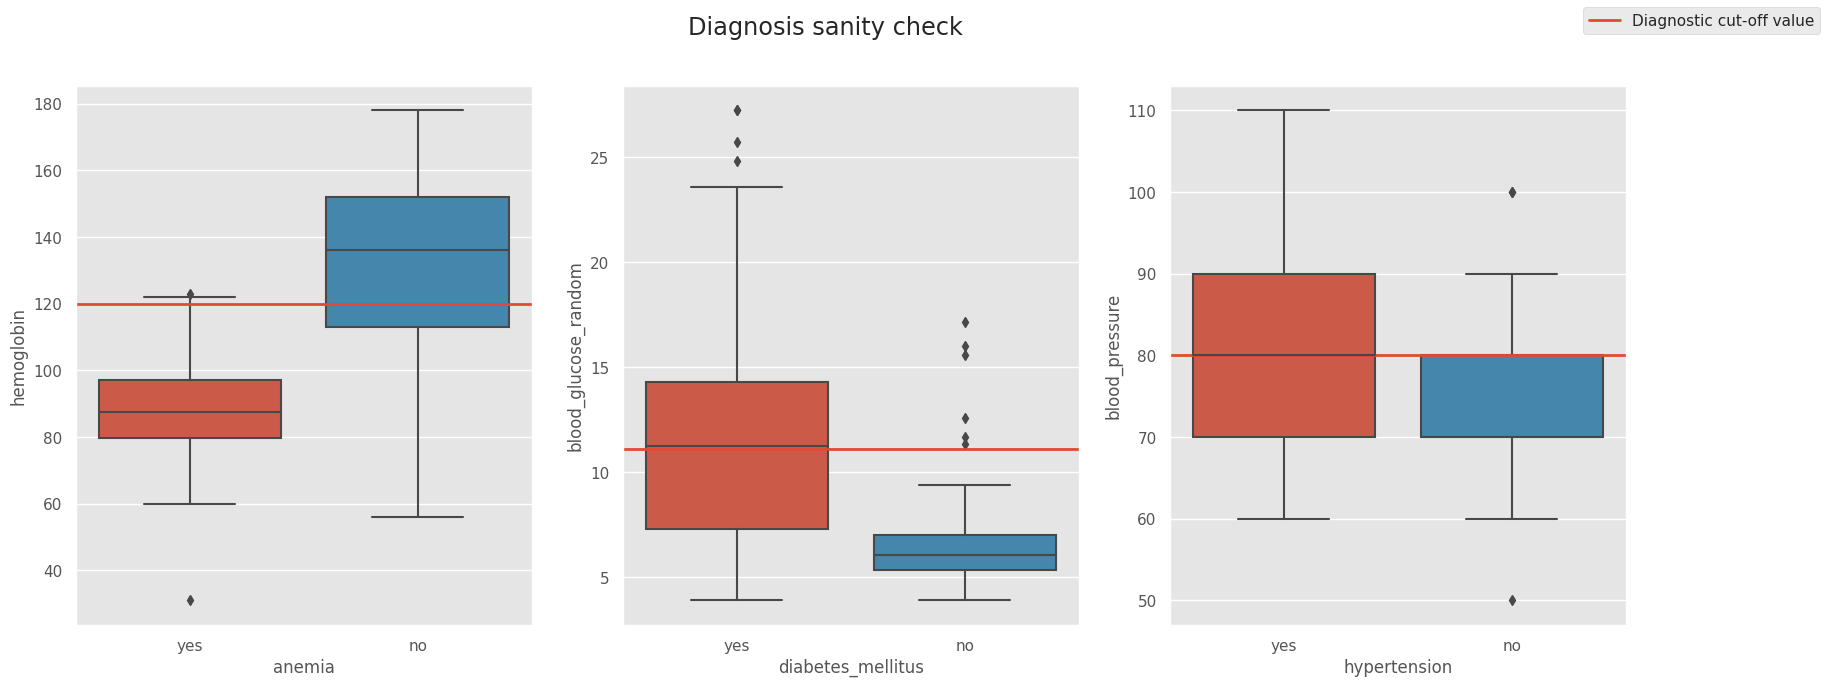

In [39]:
# Check if anemia and diabetes diagnosis make sense
fig, axes = plt.subplots(1,3, figsize=(20,7))
sns.boxplot(data=df, y="hemoglobin", x="anemia", ax=axes[0], order=["yes", "no"])
sns.boxplot(data=df, y="blood_glucose_random", x="diabetes_mellitus", ax=axes[1], order=["yes", "no"])
sns.boxplot(data=df, y="blood_pressure", x="hypertension", ax=axes[2], order=["yes", "no"])

axes[0].axhline(120, linewidth=2, label="Diagnostic cut-off value") # Anemia: hemoglobin < 120 g/L
axes[1].axhline(11.1, linewidth=2) # Diabetes: random glucose > 11.1 mmol/L
axes[2].axhline(80, linewidth=2) # Hypertension: diastolic blood pressure >= 80 mmHg

fig.suptitle("Diagnosis sanity check", fontsize="xx-large")
fig.legend();

In [40]:
# Correct the diagnosis and drop the anemia column

#df["diabetes_mellitus"] = df.apply(lambda x: "yes" if x["blood_glucose_random"] >= 11.1 else "no", axis=1)
#df["hypertension"] = df.apply(lambda x: "yes" if x["blood_pressure"] >= 80 else "no", axis=1)
#df = df.drop(columns=["anemia"])

### INSIGHTS:
- Left skewed age distribution
- Missing values for important parameters (dataset size drops to 288 after removing entries with missing data)
- Relationship between features seams logical
- <span style="color:red">Patients with diagnosed hypertension, diabetes and coronary artery disease only in CKD group!</span> (bias in sampling?)
- <span style="color:red">Diagnosis of anemia and hypertension does not match the criteria!</span> (no info on variables - huge problem)
- <span style="color:red">Serum creatinine values do not match any known unit </span>